# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

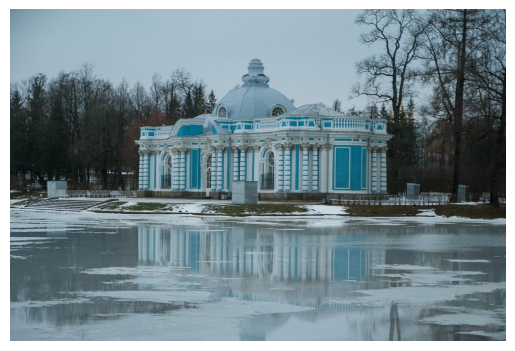

In [1]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

random_state=12

# Путь к изображению
img_path = 'spb_barocco.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [2]:
print(img.shape)

(856, 1280, 3)


Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [3]:
print(img.mean())

121.34244974201714


Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [4]:
h, w, c = img.shape
data = img / 255
print(data.mean())
data = data.reshape(h*w, c)

0.4758527440863417


Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [5]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

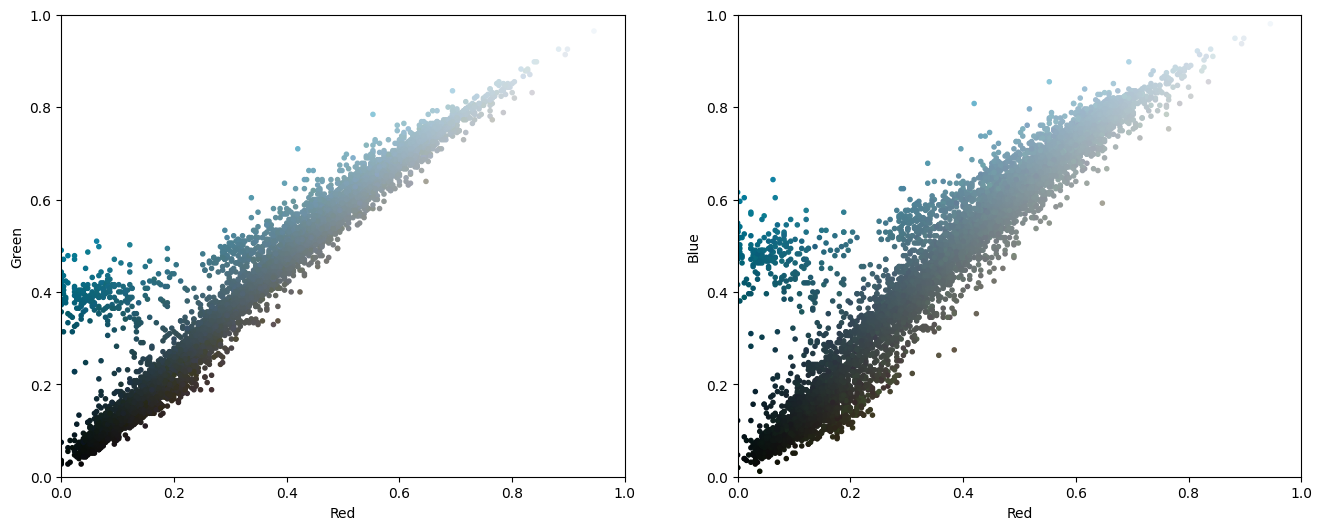

In [6]:
plot_pixels(data)

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


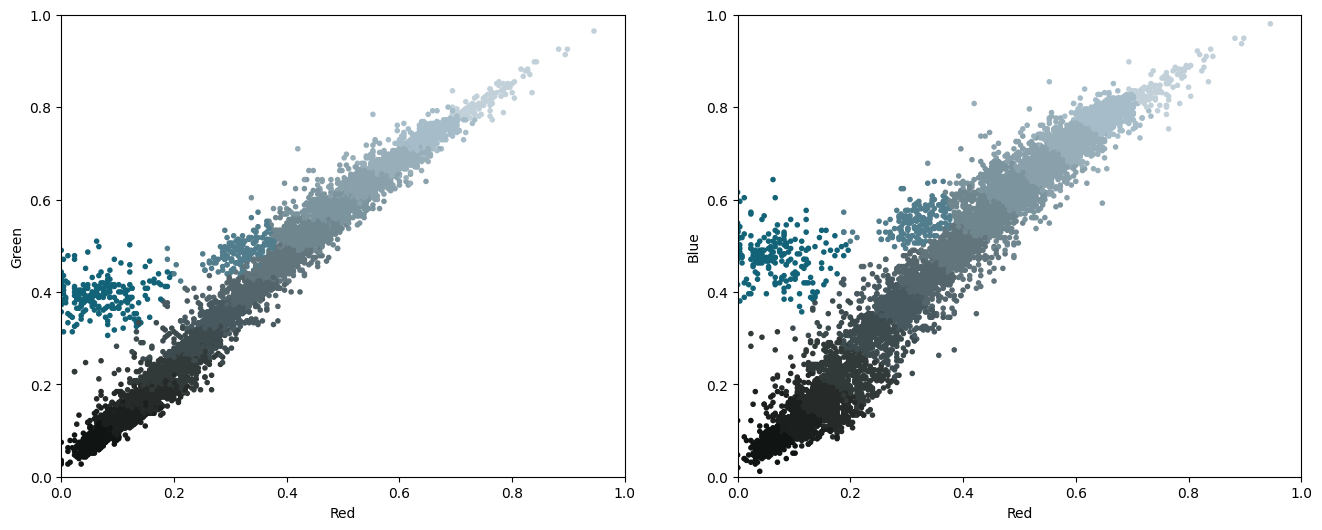

In [8]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=16, random_state=random_state)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors)

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [9]:
print(np.mean(new_colors))

0.4754014758648951


Выберите номер изображения, соответствующего палитре из $16$ цветов.

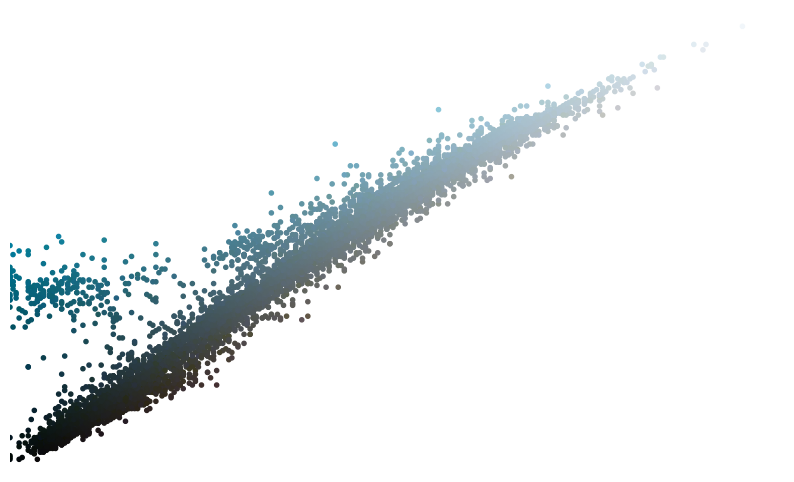

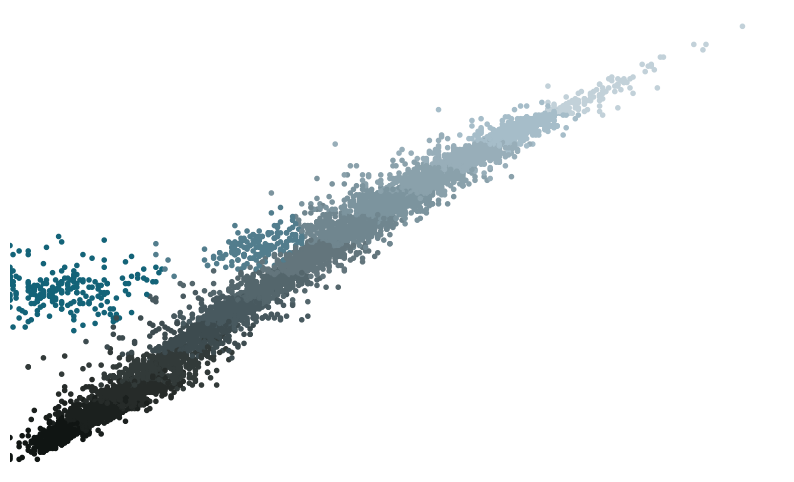

In [12]:
def plot_pixels_for_task(data, colors=None, N=10000, f_name=None):
  if colors is None:
    colors = data

  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 1, figsize=(10, 6))
  ax.scatter(R, G, color=colors, marker='.')
  ax.set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
  plt.axis('off')
  plt.savefig(f_name, dpi=300)

plot_pixels_for_task(data, f_name='Clust_RG_palette_1.png')
plot_pixels_for_task(data, colors=new_colors, f_name='Clust_RG_palette_2.png')

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

Text(0.5, 1.0, 'Исходное в 16 цветах')

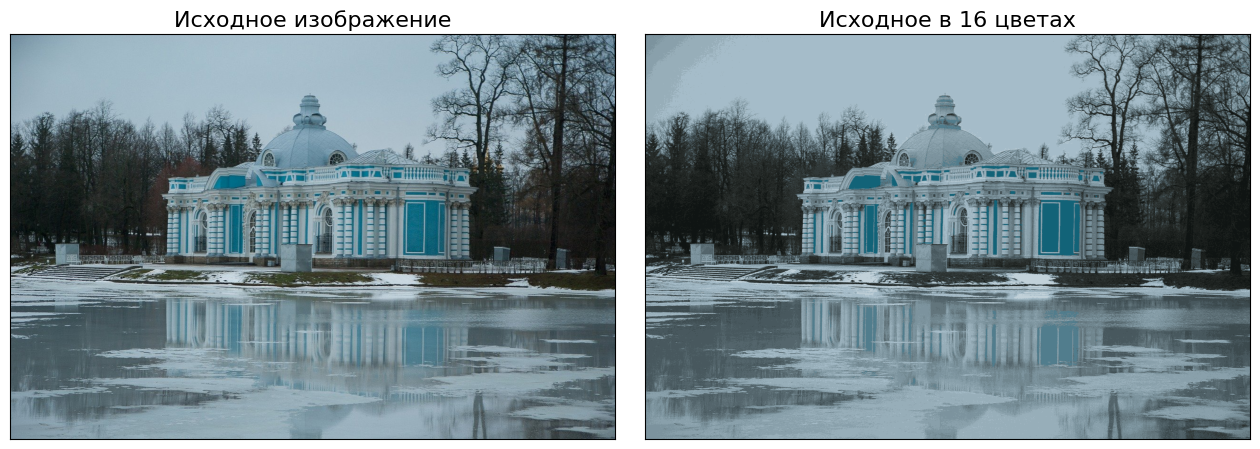

In [14]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Исходное изображение', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('Исходное в 16 цветах', size=16)

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

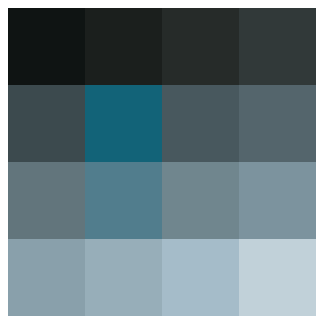

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(5,5), dpi=80)
colors = np.unique(img_recolored.reshape(-1, img_recolored.shape[2]), axis=0)
colors = sorted(colors, key=sum)
colors = np.array(colors).reshape(4,4,3)
plt.axis('off')
plt.imshow(colors)